In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
fontsize2use = 10
from sklearn.linear_model import LinearRegression
import math
import random
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go

In [11]:
df = pd.read_csv('personality_scored_answers_anonymised.csv', delimiter = ';')
df.head()

,Column1,Part 1 : Opposing Descriptions [Accepts things as they are | Unsatisfied with the way things are],Part 1 : Opposing Descriptions [Bases morality on justice | Bases morality on compassion],Part 1 : Opposing Descriptions [Bored by time alone | Needs time alone],Part 1 : Opposing Descriptions [Chaotic | Organized],Part 1 : Opposing Descriptions [Easily hurt | Thick-skinned],Part 1 : Opposing Descriptions [Energetic | Mellow],Part 1 : Opposing Descriptions [Finds it difficult to yell very loudly | Yelling to others when they are far away comes naturally],Part 1 : Opposing Descriptions [Fits in | Stands out],Part 1 : Opposing Descriptions [Focused on the present | Focused on the future],...,human_BRS,human_DGS,human_BARON_COHEN_if_male,human_BARON_COHEN_if_female,human_IPIP_Extraversion,human_IPIP_Agreeableness,human_IPIP_Conscientiousness,human_IPIP_Emotional Stability/Neuroticism,human_IPIP_Intellect/Imagination / openness to experiences,IPIP_HIGH_RISK
0,0,3,4,4,2,3,5,3,5,4,...,medium resilient,medium grit,above average,above average,medium,medium,high,medium,medium,NaN
1,1,4,3,1,1,1,5,3,3,5,...,medium resilient,medium grit,average,above average,high,high,high,high,medium,NaN
2,2,3,3,1,1,1,4,3,3,4,...,medium resilient,medium grit,average,average,medium,medium,medium,medium,medium,NaN
3,3,4,3,2,1,1,4,2,4,4,...,medium resilient,medium grit,below average,average,medium,low,low,high,medium,NaN
4,4,4,5,3,4,3,4,5,4,4,...,medium resilient,medium grit,below average,average,medium,low,high,medium,low,NaN


In [12]:
df.tail()

,Column1,Part 1 : Opposing Descriptions [Accepts things as they are | Unsatisfied with the way things are],Part 1 : Opposing Descriptions [Bases morality on justice | Bases morality on compassion],Part 1 : Opposing Descriptions [Bored by time alone | Needs time alone],Part 1 : Opposing Descriptions [Chaotic | Organized],Part 1 : Opposing Descriptions [Easily hurt | Thick-skinned],Part 1 : Opposing Descriptions [Energetic | Mellow],Part 1 : Opposing Descriptions [Finds it difficult to yell very loudly | Yelling to others when they are far away comes naturally],Part 1 : Opposing Descriptions [Fits in | Stands out],Part 1 : Opposing Descriptions [Focused on the present | Focused on the future],...,human_BRS,human_DGS,human_BARON_COHEN_if_male,human_BARON_COHEN_if_female,human_IPIP_Extraversion,human_IPIP_Agreeableness,human_IPIP_Conscientiousness,human_IPIP_Emotional Stability/Neuroticism,human_IPIP_Intellect/Imagination / openness to experiences,IPIP_HIGH_RISK
1550,1550,1,5,1,5,5,5,1,5,5,...,medium resilient,medium grit,above average,above average,medium,high,low,high,high,NaN
1551,1551,1,4,1,5,5,5,4,5,5,...,medium resilient,medium grit,average,average,high,high,medium,high,low,NaN
1552,1552,4,2,3,2,5,3,4,3,4,...,high resilient,medium grit,above average,above average,high,medium,medium,high,high,NaN
1553,1553,1,1,1,2,1,1,2,1,2,...,medium resilient,medium grit,average,above average,high,low,high,medium,high,NaN
1554,1554,3,3,3,2,3,3,4,3,3,...,medium resilient,medium grit,below average,average,low,medium,medium,high,low,NaN


In [26]:
df.describe()

,Column1,Part 1 : Opposing Descriptions [Accepts things as they are | Unsatisfied with the way things are],Part 1 : Opposing Descriptions [Bases morality on justice | Bases morality on compassion],Part 1 : Opposing Descriptions [Bored by time alone | Needs time alone],Part 1 : Opposing Descriptions [Chaotic | Organized],Part 1 : Opposing Descriptions [Easily hurt | Thick-skinned],Part 1 : Opposing Descriptions [Energetic | Mellow],Part 1 : Opposing Descriptions [Finds it difficult to yell very loudly | Yelling to others when they are far away comes naturally],Part 1 : Opposing Descriptions [Fits in | Stands out],Part 1 : Opposing Descriptions [Focused on the present | Focused on the future],...,TEQ,BRS,DGS,BARON_COHEN,IPIP_Extraversion,IPIP_Agreeableness,IPIP_Conscientiousness,IPIP_Emotional Stability/Neuroticism,IPIP_Intellect/Imagination / openness to experiences,IPIP_HIGH_RISK
count,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,...,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,0.0
mean,777.000000,3.147910,3.231511,3.354341,3.560129,3.241801,3.034727,2.675241,3.335048,3.655949,...,48.630868,3.644051,4.010289,12.274598,30.852733,42.180064,42.149196,36.118328,40.086174,NaN
std,449.034149,1.300426,1.192711,1.284939,1.224778,1.318877,1.397765,1.371947,1.221967,1.148815,...,6.762096,0.577727,0.566376,3.864479,8.076902,5.346042,5.924742,7.025337,5.469963,NaN
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,25.000000,1.666667,1.400000,1.000000,10.000000,22.000000,16.000000,12.000000,20.000000,NaN
25%,388.500000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000,3.000000,3.000000,...,44.000000,3.333333,3.700000,9.000000,26.000000,38.000000,38.000000,32.000000,36.000000,NaN
50%,777.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,49.000000,3.666667,4.100000,13.000000,30.000000,42.000000,44.000000,38.000000,40.000000,NaN
75%,1165.500000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,54.000000,4.000000,4.400000,15.000000,36.000000,46.000000,46.000000,42.000000,44.000000,NaN
max,1554.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,64.000000,5.000000,5.000000,20.000000,50.000000,50.000000,50.000000,50.000000,50.000000,NaN


In [14]:
#below I was trying to determine all the column values(names),so I can select the ones I need to work with

In [15]:
print(df.columns.values)

['Column1'
 'Part 1 : Opposing Descriptions [Accepts things as they are | Unsatisfied with the way things are]'
 'Part 1 : Opposing Descriptions [Bases morality on justice | Bases morality on compassion]'
 'Part 1 : Opposing Descriptions [Bored by time alone | Needs time alone]'
 'Part 1 : Opposing Descriptions [Chaotic | Organized]'
 'Part 1 : Opposing Descriptions [Easily hurt | Thick-skinned]'
 'Part 1 : Opposing Descriptions [Energetic | Mellow]'
 'Part 1 : Opposing Descriptions [Finds it difficult to yell very loudly |  Yelling to others when they are far away comes naturally]'
 'Part 1 : Opposing Descriptions [Fits in | Stands out]'
 'Part 1 : Opposing Descriptions [Focused on the present | Focused on the future]'
 'Part 1 : Opposing Descriptions [Follows the heart | Follows the head]'
 'Part 1 : Opposing Descriptions [Gets work done right away | Procrastinates]'
 'Part 1 : Opposing Descriptions [Gets worn out by parties | Gets fired up by parties]'
 'Part 1 : Opposing Descriptio

In [28]:
#now I want to select the certain columns I want to work with and then rename them are creating a new dataframe with new columns: df1, with new column names


df1 = df[['TEQ', 'BRS', 'DGS', 'BARON_COHEN',
 'IPIP_Extraversion', 'IPIP_Agreeableness', 'IPIP_Conscientiousness',
 'IPIP_Emotional Stability/Neuroticism',
 'IPIP_Intellect/Imagination / openness to experiences']]
df1

,TEQ,BRS,DGS,BARON_COHEN,IPIP_Extraversion,IPIP_Agreeableness,IPIP_Conscientiousness,IPIP_Emotional Stability/Neuroticism,IPIP_Intellect/Imagination / openness to experiences
0,45,3.166667,3.9,18,30,40,48,36,42
1,53,4.166667,4.8,13,42,46,46,40,42
2,51,4.333333,4.3,11,28,40,40,38,42
3,33,4.000000,3.6,9,30,38,38,40,38
4,50,3.500000,3.9,7,28,34,46,38,36
5,51,3.833333,4.3,14,48,46,42,46,36
6,47,3.500000,4.4,13,38,44,50,36,42
7,56,3.833333,4.6,16,30,48,48,42,42
8,41,4.000000,4.0,11,40,46,48,44,48
9,47,3.166667,2.5,8,32,44,36,18,42


In [39]:
#Now we are renaming columns: df2 df[TEQ, BRS, DGS , BARON_COHEN,IPIP_Extraversion, IPIP_Agreeableness, IPIP_Conscientiousness,IPIP_Emotional Stability/Neuroticism,IPIP_Intellect/Imagination / openness to experiences] to [TEQ, BRS, DGS , B_C,IPIP_E, IPIP_A, IPIP_C,IPIP_EN,IPIP_IIO]
''
df1.rename(columns={'BARON_COHEN': 'BC', 'IPIP_Extraversion': 'I_E','IPIP_Agreeableness': 'I_A', 'IPIP_Conscientiousness': 'I_C', 'IPIP_Emotional Stability/Neuroticism': 'I_EN', 'IPIP_Intellect/Imagination / openness to experiences': 'I_IIO'}, inplace=True)
df1

,TEQ,BRS,DGS,BC,I_E,I_A,I_C,I_EN,I_IIO
0,45,3.166667,3.9,18,30,40,48,36,42
1,53,4.166667,4.8,13,42,46,46,40,42
2,51,4.333333,4.3,11,28,40,40,38,42
3,33,4.000000,3.6,9,30,38,38,40,38
4,50,3.500000,3.9,7,28,34,46,38,36
5,51,3.833333,4.3,14,48,46,42,46,36
6,47,3.500000,4.4,13,38,44,50,36,42
7,56,3.833333,4.6,16,30,48,48,42,42
8,41,4.000000,4.0,11,40,46,48,44,48
9,47,3.166667,2.5,8,32,44,36,18,42


In [40]:
df1.describe()

,TEQ,BRS,DGS,BC,I_E,I_A,I_C,I_EN,I_IIO
count,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000
mean,48.630868,3.644051,4.010289,12.274598,30.852733,42.180064,42.149196,36.118328,40.086174
std,6.762096,0.577727,0.566376,3.864479,8.076902,5.346042,5.924742,7.025337,5.469963
min,25.000000,1.666667,1.400000,1.000000,10.000000,22.000000,16.000000,12.000000,20.000000
25%,44.000000,3.333333,3.700000,9.000000,26.000000,38.000000,38.000000,32.000000,36.000000
50%,49.000000,3.666667,4.100000,13.000000,30.000000,42.000000,44.000000,38.000000,40.000000
75%,54.000000,4.000000,4.400000,15.000000,36.000000,46.000000,46.000000,42.000000,44.000000
max,64.000000,5.000000,5.000000,20.000000,50.000000,50.000000,50.000000,50.000000,50.000000


In [42]:
#the number of dimensions in the dataframe

df1.ndim

2

In [43]:
np.random.rand(10,9)

array([[0.62805243, 0.48479503, 0.03086679, 0.62706989, 0.66505508,
        0.9037872 , 0.88039574, 0.00956017, 0.94699679],
       [0.45374274, 0.03618801, 0.05865473, 0.1404873 , 0.90016557,
        0.65274264, 0.96987194, 0.09080544, 0.35813024],
       [0.03515004, 0.98865611, 0.03351833, 0.8065837 , 0.17181447,
        0.20937365, 0.41253427, 0.28749942, 0.80328083],
       [0.84592376, 0.39089589, 0.29273108, 0.53735939, 0.49117547,
        0.54497451, 0.0818327 , 0.60284984, 0.09342295],
       [0.7073579 , 0.9917061 , 0.16565678, 0.3780719 , 0.1370119 ,
        0.07394278, 0.88662861, 0.45920481, 0.44179276],
       [0.29112068, 0.67547215, 0.28316221, 0.41698066, 0.02791409,
        0.09405777, 0.54988041, 0.8109686 , 0.6754926 ],
       [0.67809866, 0.54295415, 0.38884818, 0.90964568, 0.86459626,
        0.74991854, 0.42808781, 0.1555115 , 0.95150678],
       [0.75208202, 0.86555188, 0.44758398, 0.03576985, 0.09874942,
        0.27110945, 0.58692008, 0.53791385, 0.46490284],


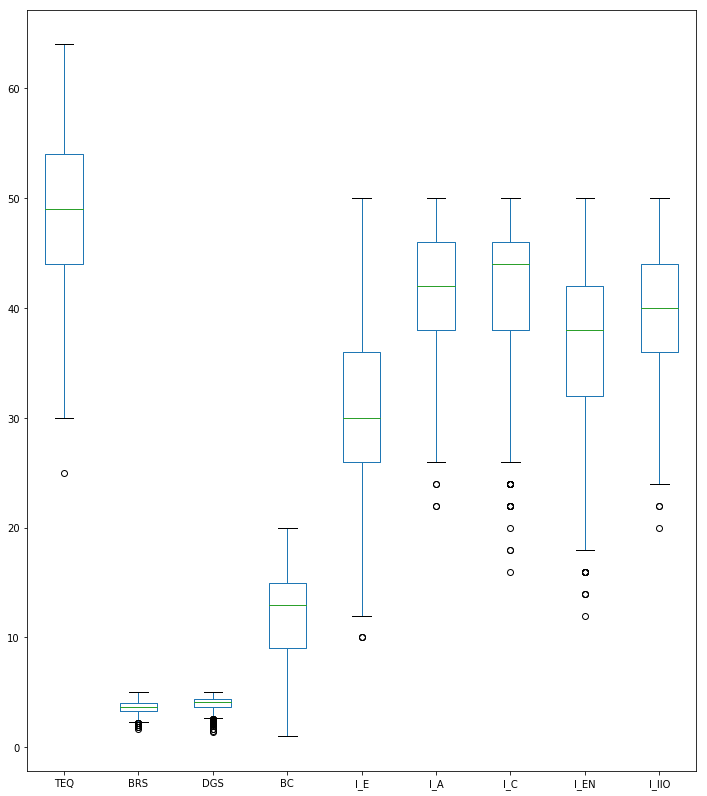

In [44]:
#Below we have interpreted the whole summary of the data from df1.describe (mean, standard deviation, minimum,25%/1st quartile),2nd quartile/75% and the maximum) 

#the small circles below the minimum value indicate the outliers of the dataset

df1.plot.box(return_type='axes', figsize=(12,14))

In [59]:
#now i broke down the data to determine the correlation across the whole dataframe so I can be able to put it in graphs 

df1.corr()

,TEQ,BRS,DGS,BC,I_E,I_A,I_C,I_EN,I_IIO
TEQ,1.000000,0.221029,0.303513,0.203713,0.167818,0.486088,0.128233,0.146103,0.289239
BRS,0.221029,1.000000,0.366667,0.341931,0.207132,0.208905,0.246952,0.434392,0.263368
DGS,0.303513,0.366667,1.000000,0.304355,0.156446,0.260752,0.411152,0.344168,0.223585
BC,0.203713,0.341931,0.304355,1.000000,0.168434,0.199317,0.298262,0.313427,0.382023
I_E,0.167818,0.207132,0.156446,0.168434,1.000000,0.273577,0.058767,0.229161,0.215534
I_A,0.486088,0.208905,0.260752,0.199317,0.273577,1.000000,0.215643,0.190644,0.361328
I_C,0.128233,0.246952,0.411152,0.298262,0.058767,0.215643,1.000000,0.271426,0.198006
I_EN,0.146103,0.434392,0.344168,0.313427,0.229161,0.190644,0.271426,1.000000,0.138320
I_IIO,0.289239,0.263368,0.223585,0.382023,0.215534,0.361328,0.198006,0.138320,1.000000


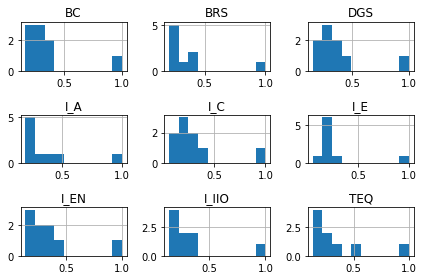

In [68]:
df_corr = df1.corr()

df_corr.hist()
plt.tight_layout()

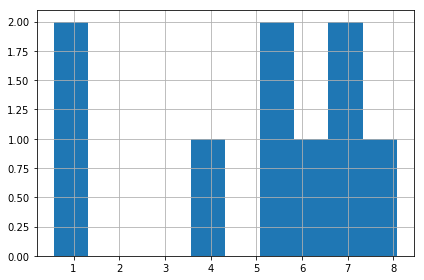

In [77]:
df_std = df1.std()

df_std.hist()
plt.tight_layout()